In [3]:
!unzip -qo "MedNIST.zip"
!rm "MedNIST.zip"

In [1]:
import os 
import numpy as np
import pandas as pd 
import random 
import datetime
import shutil
import math

In [2]:
def prep_test_data(med, train_dir, test_dir):
    pop = os.listdir(train_dir + '/' + med)
    test_data = random.sample(pop, 2000)
    for f in test_data:
        shutil.copy(train_dir + '/' + med + '/' + f, test_dir + '/' + med + '/')

**prep_test_data()** :  prepares the test dataset by randomly selecting a subset of files from the training directory and copying them to the test directory<br>
<br>
*med* : a string representing a subdirectory name <br>
*pop* : lists all files in the subdirectory med within the training directory and stores them in the list pop <br>
*test_data* : randomly selects 2000 files from the pop list and stores them in the list test_data. <br>
*for loop* : for each file in test_data, the function copies the file from the training subdirectory to the corresponding test subdirectory.

In [5]:
train_dir = 'Medical/Medical_train'
test_dir= 'Medical/Medical_test'

In [6]:
for medi in os.listdir(train_dir):
    prep_test_data(medi, train_dir, test_dir)

all subfolders on the Medical_test will have the data from Medical_train folder

In [7]:
# For train
target_classes = os.listdir(train_dir)
num_classes = len(target_classes)
print('Number of target classes : ', num_classes)
print(list(enumerate(target_classes)))

Number of target classes :  6
[(0, 'AbdomenCT'), (1, 'BreastMRI'), (2, 'ChestCT'), (3, 'CXR'), (4, 'Hand'), (5, 'HeadCT')]


In [8]:
# For test
target_classes = os.listdir(test_dir)
num_classes = len(target_classes)
print('Number of target classes : ', num_classes)
print(list(enumerate(target_classes)))

Number of target classes :  6
[(0, 'AbdomenCT'), (1, 'BreastMRI'), (2, 'ChestCT'), (3, 'CXR'), (4, 'Hand'), (5, 'HeadCT')]


In [11]:
training_set_distribution = [len(os.listdir(os.path.join(train_dir, dir))) for dir in os.listdir(train_dir)]
testing_set_distribution = [len(os.listdir(os.path.join(test_dir, dir))) for dir in os.listdir(test_dir)]
print('training_set_distribution : ', training_set_distribution)
print('testing_set_distribution : ', testing_set_distribution)

training_set_distribution :  [10000, 8954, 10000, 10000, 10000, 10000]
testing_set_distribution :  [2000, 2000, 2000, 2000, 2000, 2000]


data distribution between training and testing for each folder [AbdomenCT, BreastMRI, ChestCT, CXR, Hand, HeadCT]

In [12]:
def show_mri(med):
    num = len(med)
    if num == 0:
        return None
    rows = int(math.sqrt(num))
    cols = (num + 1) // rows

    f, axs = plt.subplots(rows, cols)
    fig = 0
    for b in med:
        img = image.load_img(b)
        row = fig // cols
        col = fig % cols
        axs[row, col].imshow(img)
        fig += 1
    plt.show()

To show an example of our data images

In [13]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image

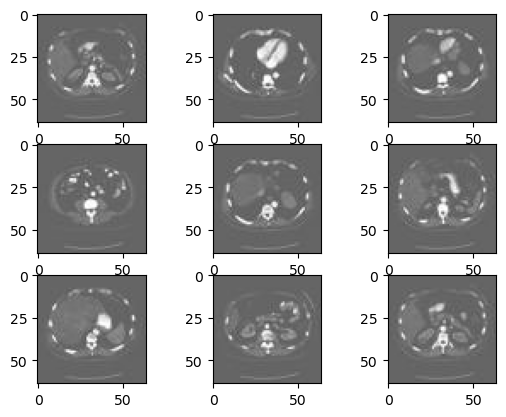

In [14]:
dir_name = os.path.join(train_dir, 'AbdomenCT')
all_images = [os.path.join(dir_name, fname) for fname in os.listdir(dir_name)]
show_mri(all_images[:9])

Example from AbdomenCT which is on the training dataset ( the first 9 images)

*os.path.join(train_dir, 'AbdomenCT')* :  constructs a path to the 'AbdomenCT' subdirectory within the train_dir directory. <br>
*os.path.join(dir_name, fname) for fname in os.listdir(dir_name)* :  creates a list of full file paths by joining each file name (fname) with the directory path (dir_name)

In [15]:
image_size = (32, 32, 3)
datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, horizontal_flip=True)
training_set = datagen.flow_from_directory(train_dir, target_size=image_size[:2], batch_size=32, class_mode='categorical', shuffle=False)
validation_set = datagen.flow_from_directory(test_dir, target_size=image_size[:2], batch_size=32, class_mode='categorical', shuffle=False)

Found 58954 images belonging to 6 classes.
Found 12000 images belonging to 6 classes.


*image_size* : specifies the target size of the images as 32x32 pixels with 3 color channels (RGB)  <br>
*image.ImageDataGenerator* :  is a Keras utility for generating batches of tensor image data with real-time data augmentation.<br>
*rescale=1./255* : normalizes the image pixel values to the range [0, 1] by dividing by 255.<br>
*shear_range=0.2* : applies random shear transformations.<br>
*horizontal_flip=True* : randomly flips the images horizontally.<br>


**Creating the Training Set and the Validation Set** : <br>
*datagen.flow_from_directory* :  generates batches of augmented image data from the train_dir directory.<br>
*target_size=image_size[:2]* :  Resizes the images to 32x32 pixels.<br>
*batch_size=32* : specifies the number of images to be included in each batch.<br>
*class_mode='categorical'* : specifies that the labels are categorical (for classification tasks).<br>
*shuffle=False* : indicates that the data should not be shuffled.


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [ ]:
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=7)
filepath = 'modelMedicalMNIST.keras'

**Callbacks** for training the machine learning model<br><br>

*EarlyStopping Callback* : is a callback that stops training when a monitored metric has stopped improving.<br>
--> monitor='val_acc': Monitors the validation accuracy.<br>
--> mode='max': Training stops when the quantity monitored (validation accuracy) has stopped increasing.<br>
--> verbose=1: Provides detailed logging output.<br>
--> patience=7: Training stops if the validation accuracy does not improve for 7 consecutive epochs.

In [ ]:
ckpt = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')

*ModelCheckpoint Callback* : saves the model after every epoch.<br>
--> filepath='modelMedicalMNIST.keras': Specifies the file path where the model will be saved.<br>
--> monitor='acc': Monitors the training accuracy.<br>
--> save_best_only=True: Saves the model only if the monitored metric (training accuracy) has improved.<br>
--> mode='max': The model is saved when the monitored quantity (training accuracy) has reached its maximum.

In [21]:
rlp = ReduceLROnPlateau(monitor='acc', patience=3, verbose=1)

*ReduceLROnPlateau Callback* :  reduces the learning rate when a metric has stopped improving.<br>
-->patience=3: Reduces the learning rate if the training accuracy does not improve for 3 consecutive epochs.<br>

In [23]:
def cnn(image_size, num_classes):
    classifier = Sequential()
    classifier.add(Conv2D(64, (5,5), input_shape=image_size, activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Flatten())
    classifier.add(Dense(num_classes, activation='softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return classifier

*) image_size: A tuple representing the dimensions of the input images (height, width, channels).<br>
*) num_classes: The number of output classes for the classification .<br>
--> Sequential model allows you to build the CNN layer by layer.<br>
--> **Adding the First Convolutional Layer** : Conv2D layer with 64 filters, each of size 5x5 and applies the ReLU activation function.<br>
*) padding='same': Ensures the output has the same width and height as the input by padding the input.<br>
--> **Adding the First Pooling Layer** : MaxPooling2D layer with a pool size of 2x2, which reduces the spatial dimensions (height and width) by a factor of 2. <br>
--> **Adding the Second Convolutional Layer** : Conv2D layer with 128 filters, each of size 3x3, and applies the ReLU activation function.<br>
--> **Adding the Second Pooling Layer** : another MaxPooling2D layer with a pool size of 2x2.<br>
--> **Flattening the Output** : Flattens the 2D output of the previous layer into a 1D vector, preparing it for the fully connected (dense) layer.<br>
--> **Adding the Output Layer** : Dense layer with a number of units equal to num_classes.<br>
*) activation='softmax': Applies the softmax activation function to output a probability distribution over the classes.<br><br><br>
**Compiling the Model** <br>
*) Optimizer: Adam : Combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp.<br>
*) Loss Function: Categorical Cross-Entropy : Measures the performance of a classification model whose output is a probability value between 0 and 1.<br>
*) Metrics: Accuracy:Measures the percentage of correct predictions made by the model.

In [24]:
neuralnetwork_cnn = cnn(image_size, num_classes)
neuralnetwork_cnn.summary()

c:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │        49,158 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,878 (499.52 KB)

 Trainable params: 127,878 (499.52 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = neuralnetwork_cnn.fit(training_set, validation_data=validation_set, callbacks=[es, ckpt, rlp], epochs=5)

Epoch 1/5


c:\Users\moham\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1842/1843 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - acc: 0.8405 - loss: 0.3921
Epoch 1: acc improved from -inf to 0.94133, saving model to modelMedicalMNIST.keras
1843/1843 ━━━━━━━━━━━━━━━━━━━━ 726s 392ms/step - acc: 0.8406 - loss: 0.3918 - val_acc: 0.9877 - val_loss: 0.0420 - learning_rate: 0.0010
Epoch 2/5
1843/1843 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - acc: 0.9927 - loss: 0.0365
Epoch 2: acc improved from 0.94133 to 0.98809, saving model to modelMedicalMNIST.keras
1843/1843 ━━━━━━━━━━━━━━━━━━━━ 179s 97ms/step - acc: 0.9927 - loss: 0.0365 - val_acc: 0.9798 - val_loss: 0.0887 - learning_rate: 0.0010
Epoch 3/5
1842/1843 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - acc: 0.9956 - loss: 0.0159
Epoch 3: acc improved from 0.98809 to 0.99688, saving model to modelMedicalMNIST.keras
1843/1843 ━━━━━━━━━━━━━━━━━━━━ 167s 91ms/step - acc: 0.9956 - loss: 0.0158 - val_acc: 0.9986 - val_loss: 0.0057 - learning_rate: 0.0010
Epoch 4/5
1842/1843 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - acc: 0.9985 - loss: 0.0060
Epoch 4: a

--> The model is trained on the batches of data generated by training_set.<br>
--> After each epoch, the model's performance is evaluated on the validation data provided by validation_set.<br>
--> The specified callbacks (es, ckpt, rlp) are applied during training<br>
--> The process repeats for the specified number of epochs (5 in this case).<br>
The history object contains information about the training process, including the loss and accuracy for each epoch for both training and validation sets.


<Axes: >

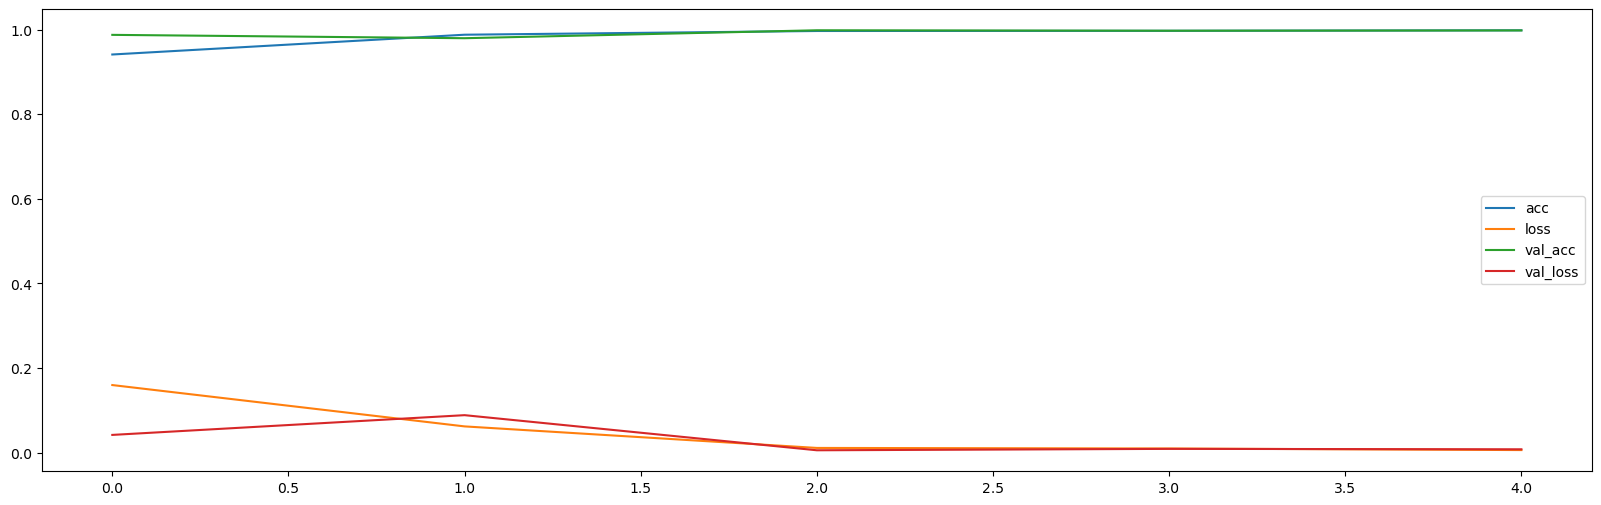

In [28]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(history.history).iloc[:, :-1].plot(ax=ax)

--> Visualize the progress of the training process (excluding validation metrics) over the epochs.<br>
*pd.DataFrame(history.history)* :Converts the history.history dictionary (which contains training and validation metrics for each epoch) into a pandas DataFrame. This allows easier access to the values and plotting.<br>
*.iloc[:, :-1]* :Selects all rows (:) but excludes the last column (:-1). The last column is typically the val_loss or val_acc, so this step removes it from the plot to focus only on the training metrics.<br>

In [30]:
batch_size = 32
pred = neuralnetwork_cnn.predict(validation_set, steps=306//batch_size)
predicted_class_indices = np.argmax(pred, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


--> make predictions using the trained neuralnetwork_cnn model on the validation dataset.<br>
*batch_size = 32* :Sets the batch size to 32, meaning the model will process 32 images at a time during prediction.<br>
*steps=306/batch_size* : Specifies the number of steps (batches) to run the prediction on. It divides the total number of validation samples (306) by the batch size (32), resulting in the number of batches needed for prediction.<br>
*np.argmax(pred, axis=1)* : Converts the predicted probabilities into class labels. Since the model outputs probabilities for each class, np.argmax returns the index (class label) with the highest probability for each sample.<br>
*predicted_class_indices* : will contain the predicted class labels for the validation dataset.

In [31]:
labels = (validation_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

--> convert the predicted class indices into human-readable class labels.<br>
*validation_set.class_indices* :  returns a dictionary mapping class labels (strings) to integer indices.<br>
*labels = dict((v,k) for k,v in labels.items())* :This line reverses the class_indices dictionary. The original dictionary has class labels as keys and integer indices as values. This line swaps them, so the new dictionary maps the integer indices to their corresponding class labels.<br>
*predictions = [labels[k] for k in predicted_class_indices]* : This list comprehension uses the reversed labels dictionary to map the predicted class indices (predicted_class_indices) back to the corresponding class labels.

In [35]:
filenames = validation_set.filenames[0]
results = pd.DataFrame({'Filename' : filenames, 'Predictions' : predictions})
results.head(15)

,Filename,Predictions
0,AbdomenCT\000001.jpeg,AbdomenCT
1,AbdomenCT\000001.jpeg,AbdomenCT
2,AbdomenCT\000001.jpeg,AbdomenCT
3,AbdomenCT\000001.jpeg,AbdomenCT
4,AbdomenCT\000001.jpeg,AbdomenCT
5,AbdomenCT\000001.jpeg,AbdomenCT
6,AbdomenCT\000001.jpeg,AbdomenCT
7,AbdomenCT\000001.jpeg,AbdomenCT
8,AbdomenCT\000001.jpeg,AbdomenCT
9,AbdomenCT\000001.jpeg,AbdomenCT


Now Input your image and test it inside this model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


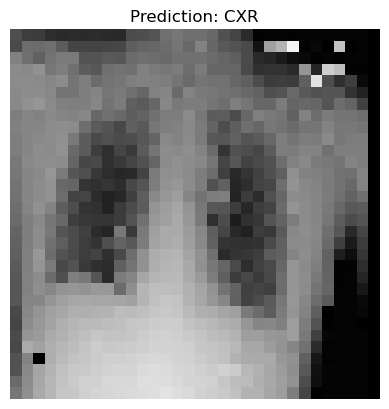

Predicted Class: CXR


In [44]:
img_path = 'images to test/image1.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=image_size[:2])  # Resize to model's input size
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale image to match the model's preprocessing

# Make the prediction
pred = neuralnetwork_cnn.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(pred, axis=1)[0]
predicted_class = list(labels.values())[predicted_class_index]

# Display the image and the prediction
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')  # Hide axes
plt.show()

print(f"Predicted Class: {predicted_class}")